In [286]:
#The following model classifies whether the input image is of the pokemon Pikachu/Charmander
#All the images used are in jpg format and were downloaded with the help of google-images-download python script (more info here:https://github.com/hardikvasa/google-images-download)
#A total of 90 images were used (45 of pikachu and 45 of charmander)
#The dataset can be found at https://github.com/stqc/DataSet/blob/master/Pikachu%20and%20charmander%20dataset.zip
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [287]:
#Glob here is used for loading all the images of pikachu and charmander respectively in 2 separate arrays
images=[cv2.imread(files,0) for files in glob.glob("c:/Users/admin/Downloads/Pikachu/*.jpg")]
char=[cv2.imread(files,0) for files in glob.glob("c:/Users/admin/Downloads/Charmander/*.jpg")]

Image Sample : 1


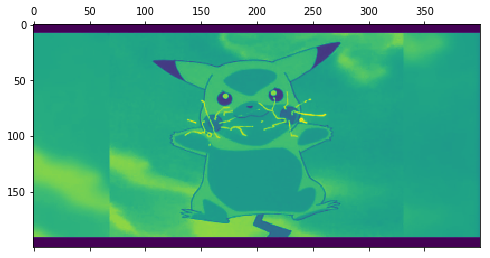

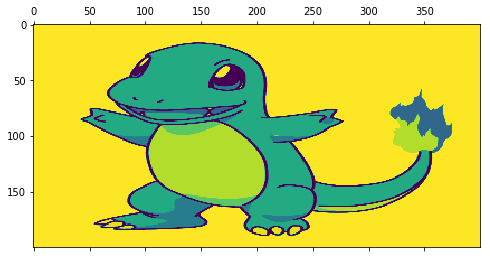

Image Sample : 2


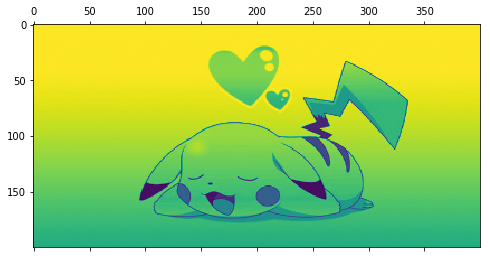

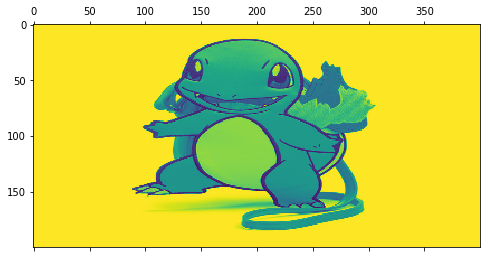

Image Sample : 3


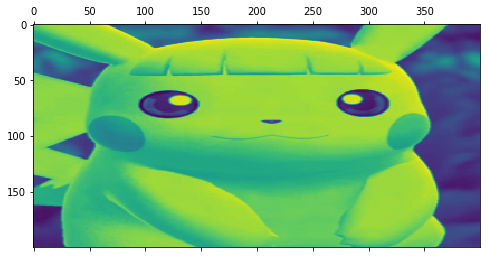

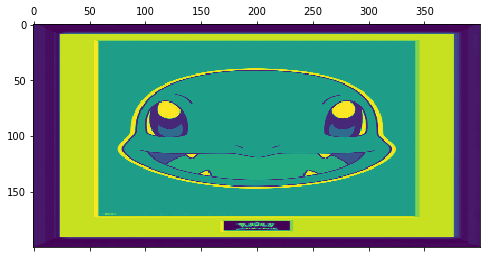

Image Sample : 4


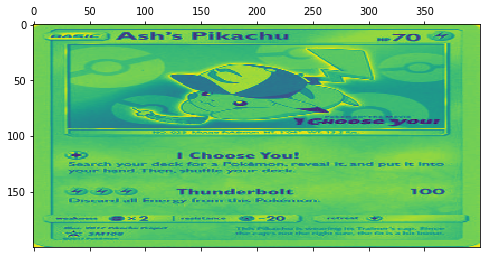

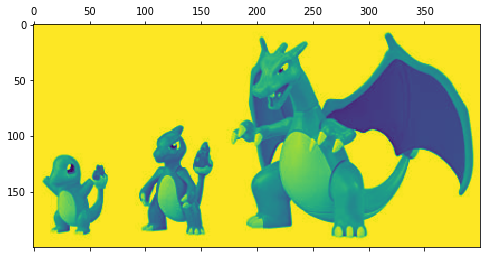

Image Sample : 5


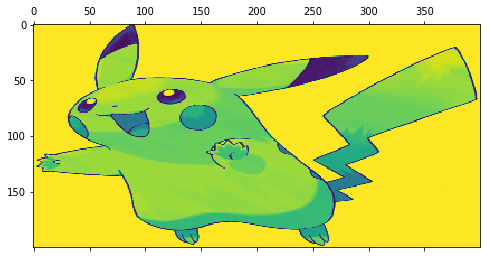

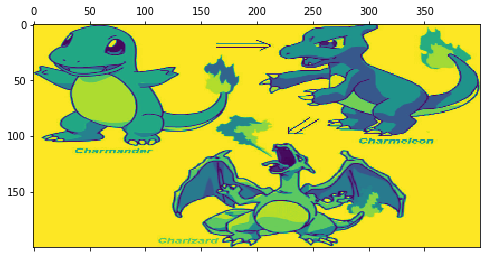

Image Sample : 6


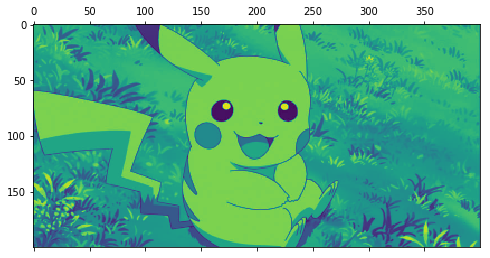

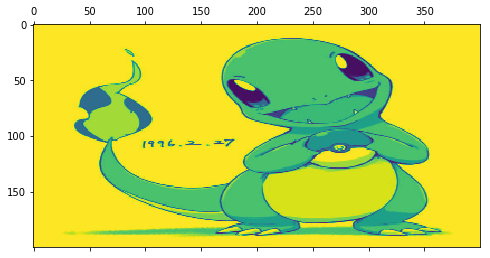

Image Sample : 7


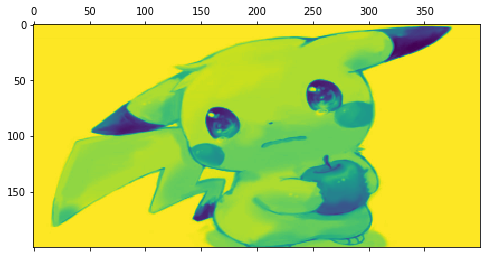

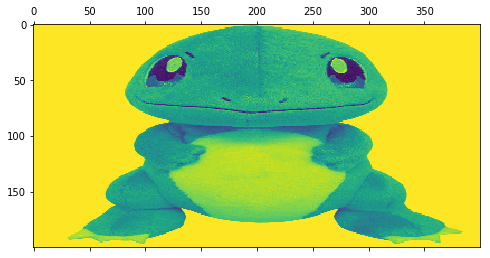

Image Sample : 8


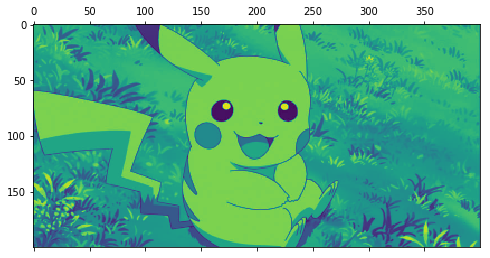

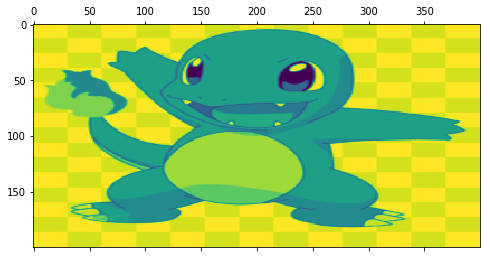

Image Sample : 9


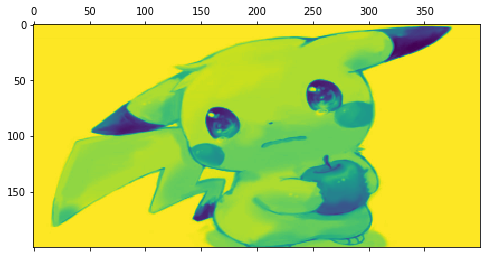

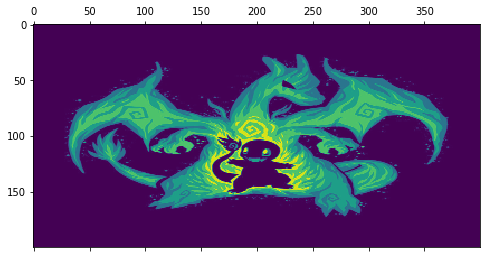

Image Sample : 10


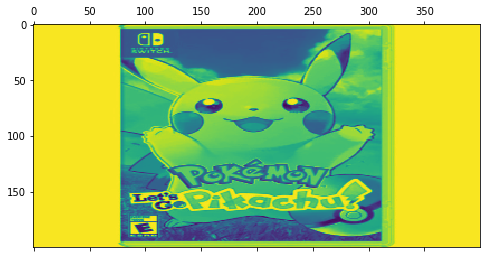

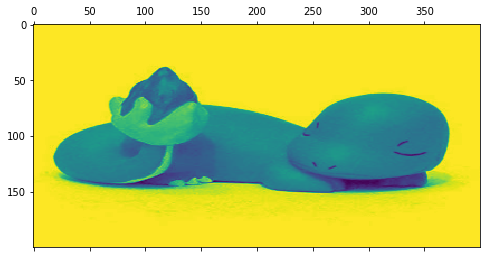

Image Sample : 11


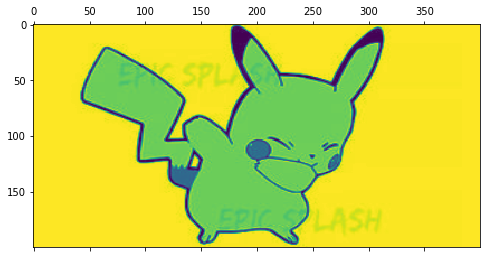

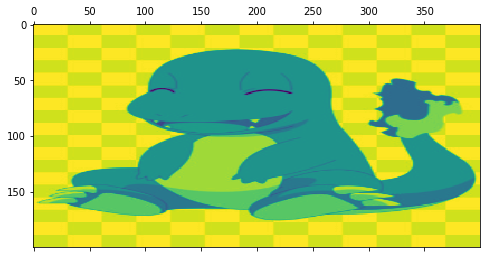

Image Sample : 12


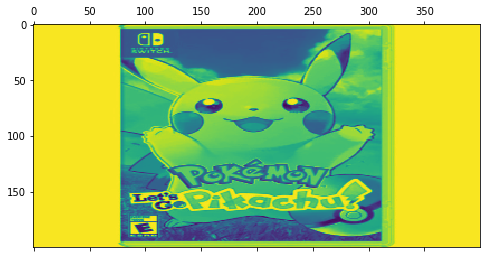

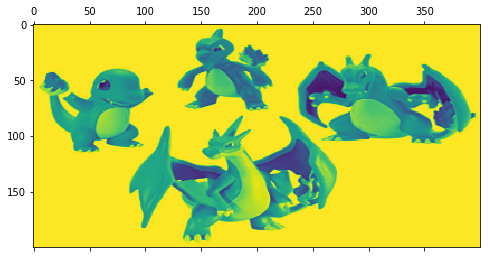

Image Sample : 13


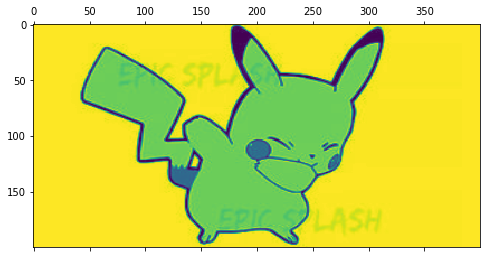

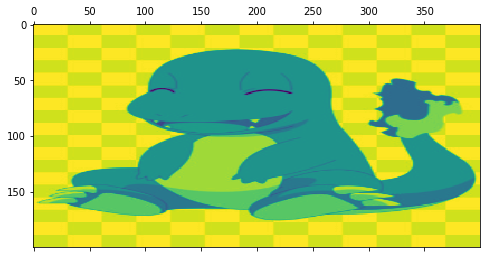

Image Sample : 14


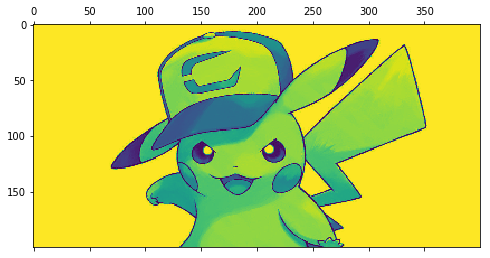

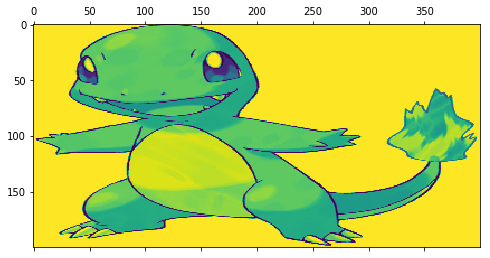

Image Sample : 15


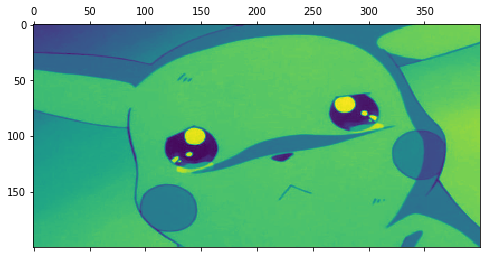

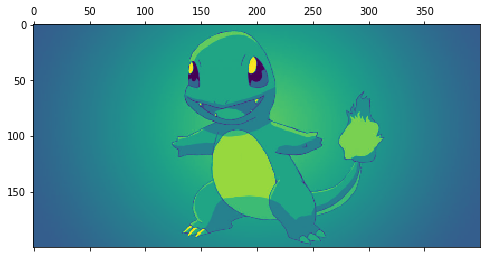

Image Sample : 16


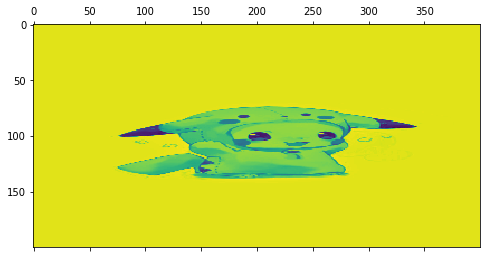

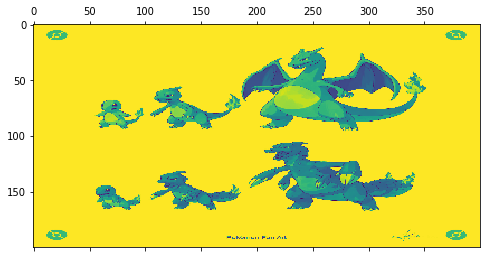

Image Sample : 17


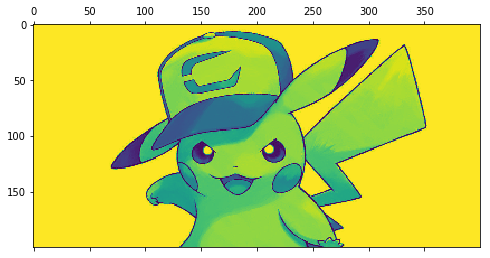

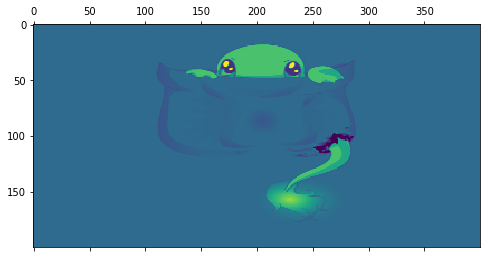

Image Sample : 18


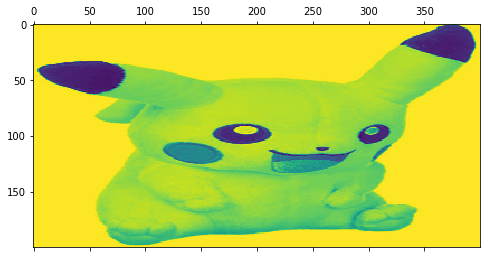

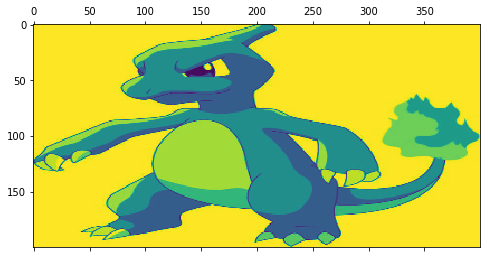

Image Sample : 19


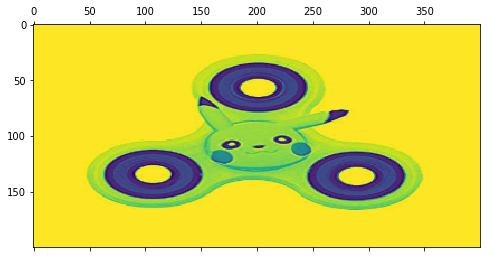

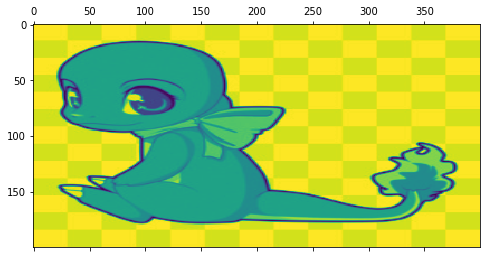

Image Sample : 20


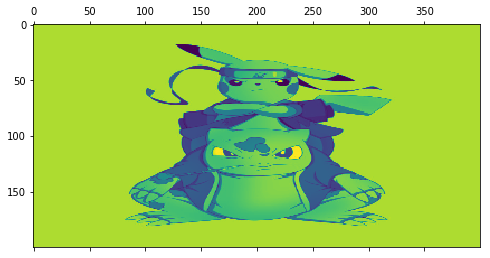

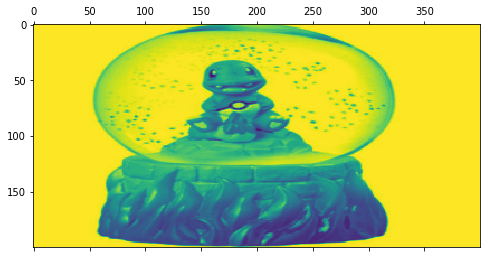

Image Sample : 21


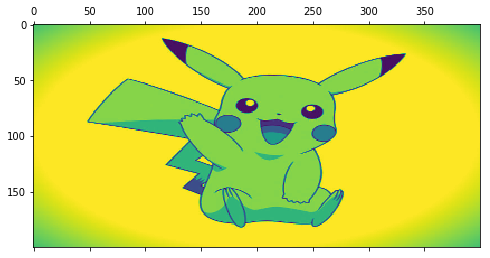

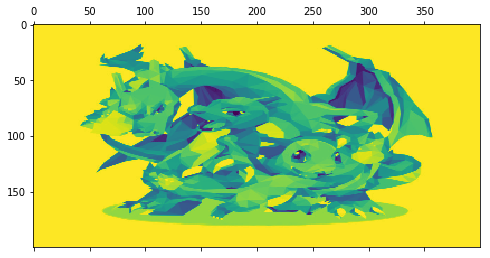

Image Sample : 22


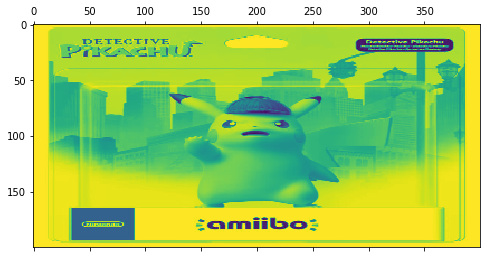

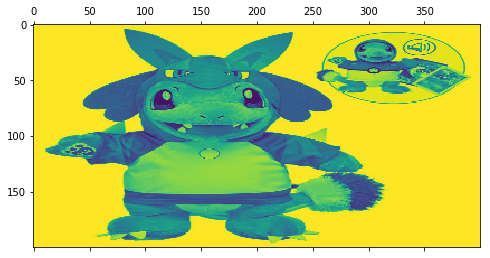

Image Sample : 23


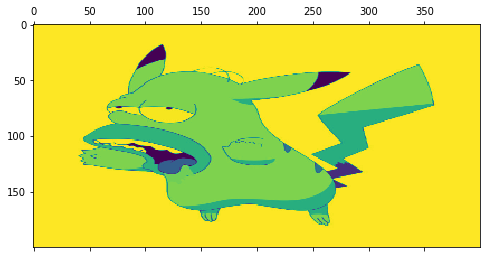

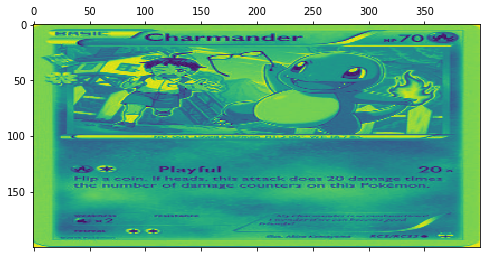

Image Sample : 24


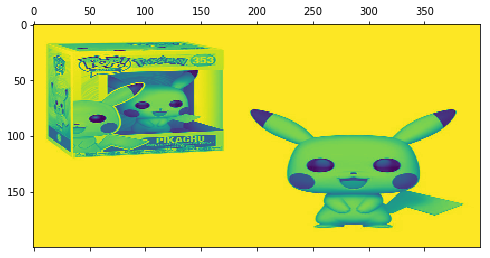

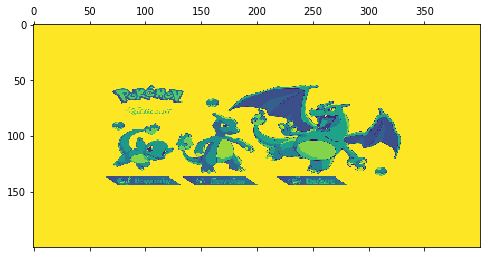

Image Sample : 25


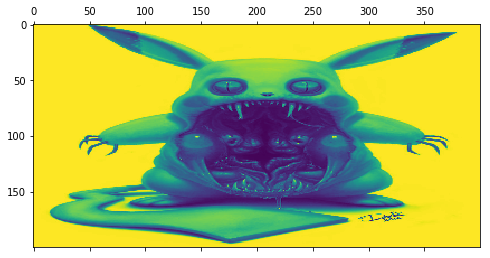

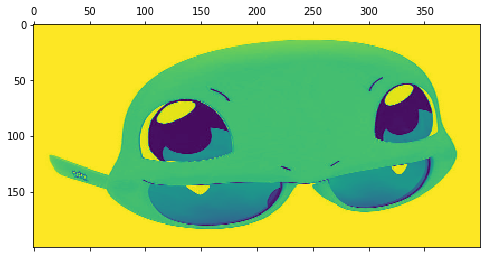

Image Sample : 26


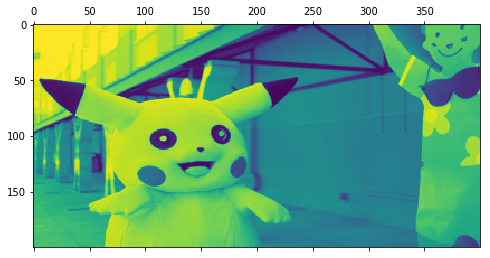

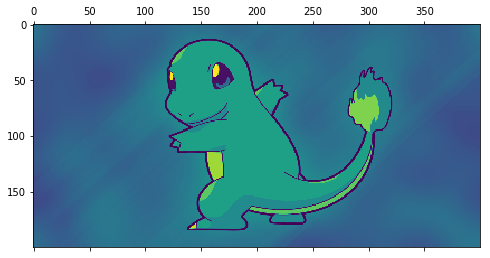

Image Sample : 27


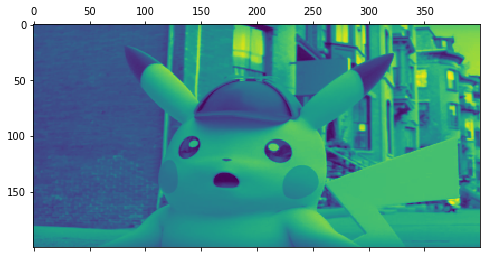

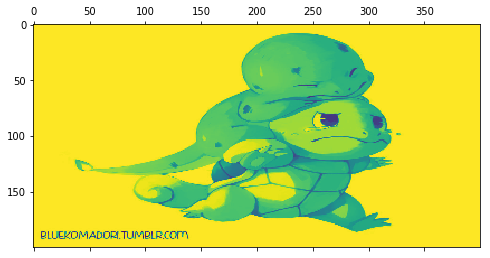

Image Sample : 28


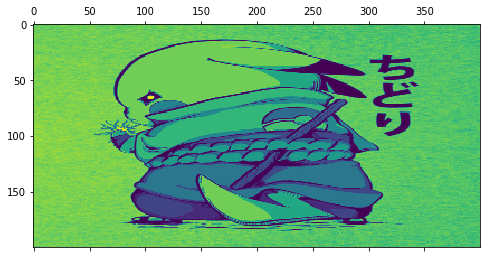

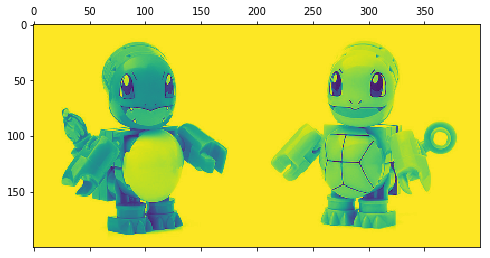

Image Sample : 29


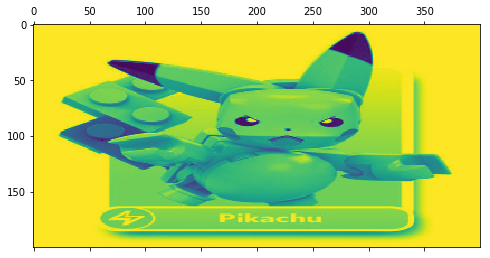

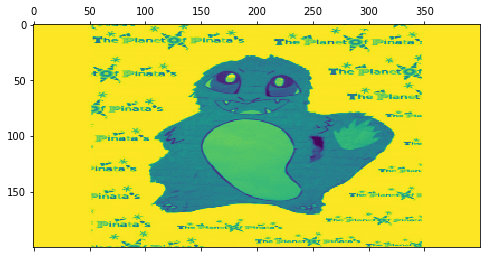

Image Sample : 30


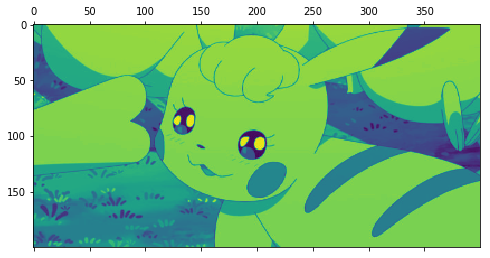

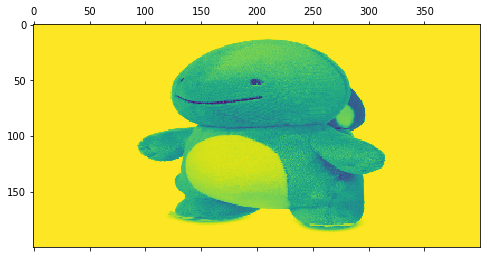

Image Sample : 31


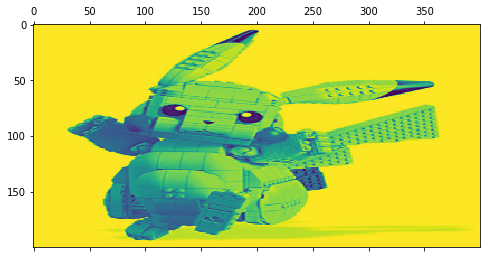

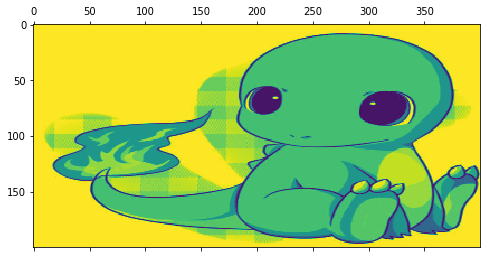

Image Sample : 32


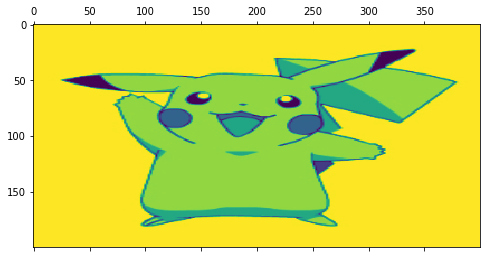

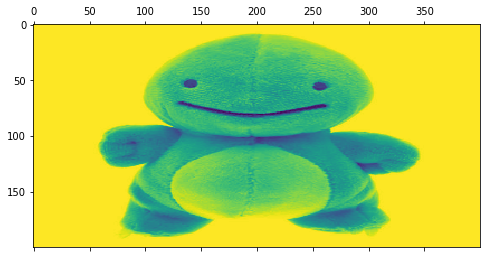

Image Sample : 33


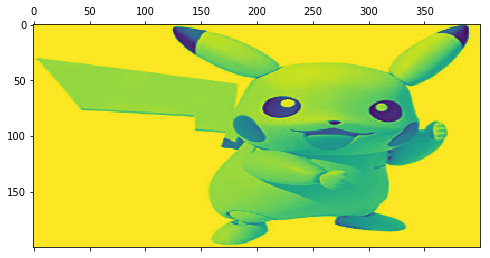

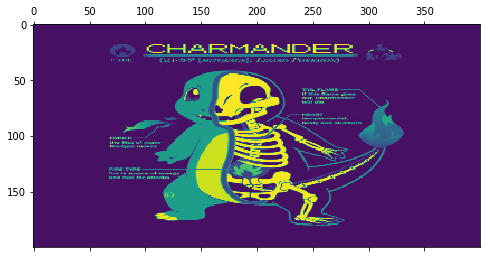

Image Sample : 34


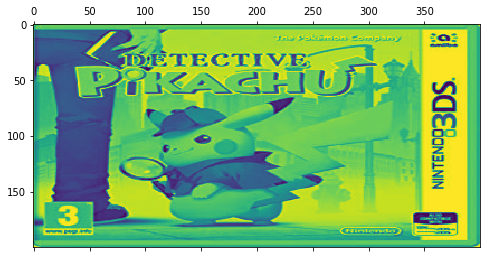

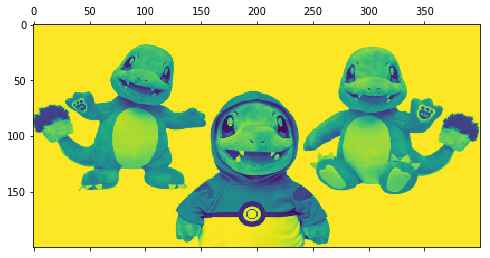

Image Sample : 35


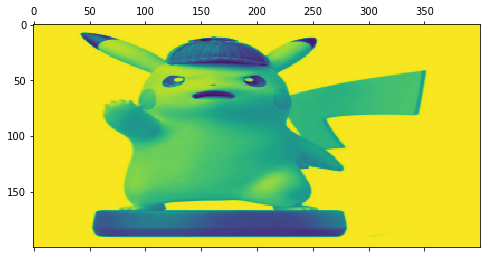

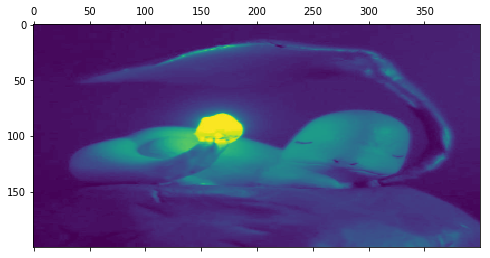

Image Sample : 36


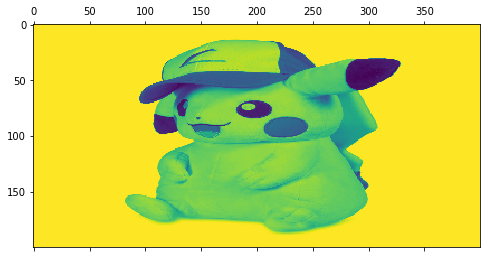

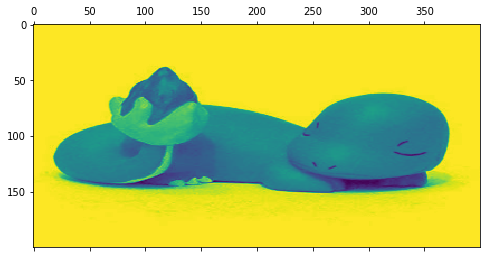

Image Sample : 37


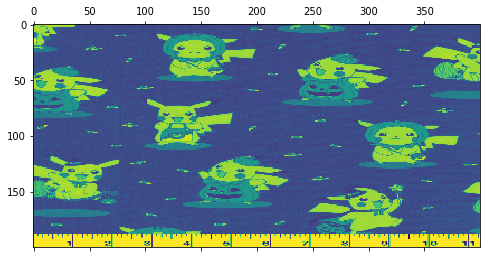

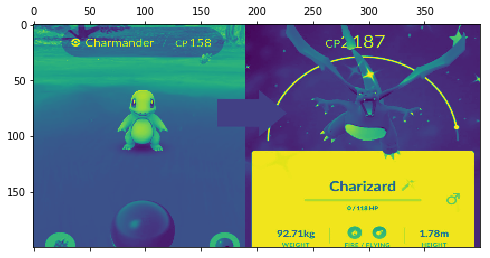

Image Sample : 38


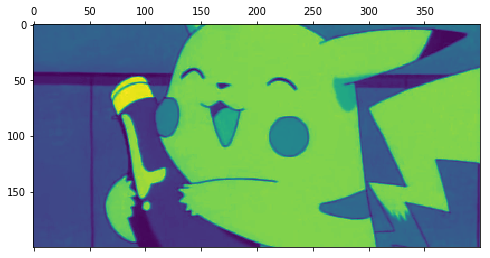

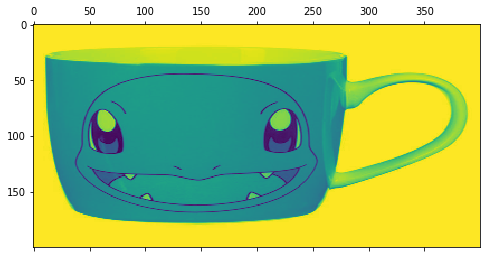

Image Sample : 39


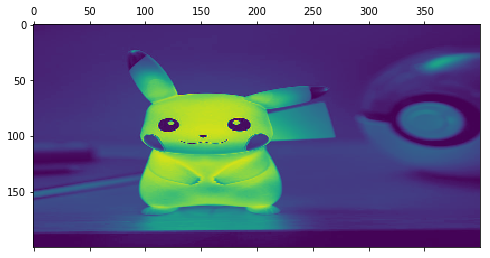

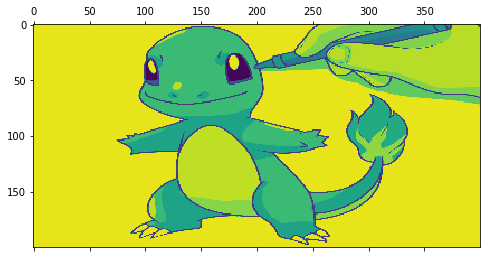

Image Sample : 40


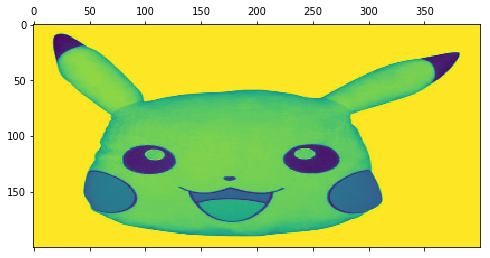

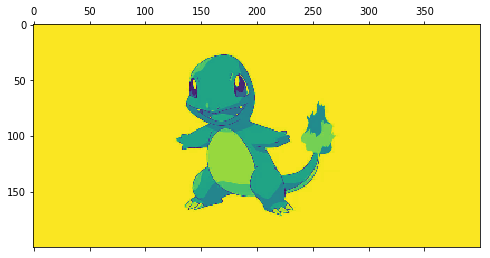

Image Sample : 41


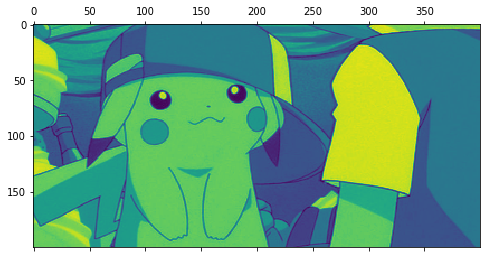

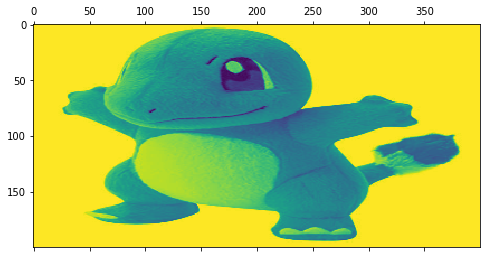

Image Sample : 42


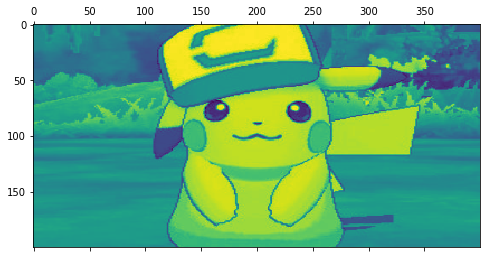

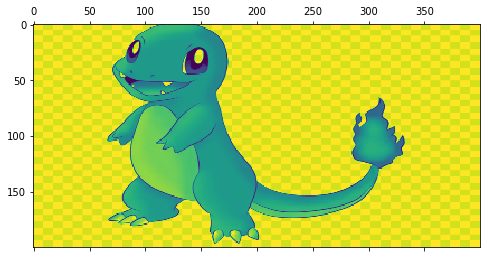

Image Sample : 43


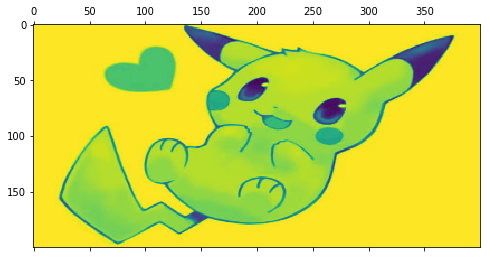

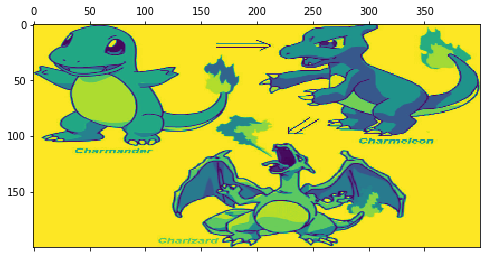

Image Sample : 44


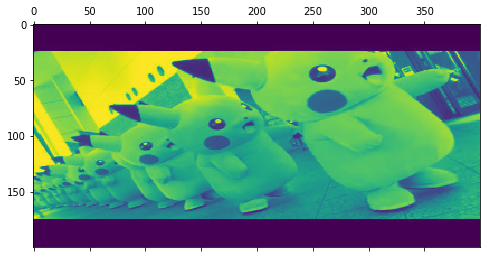

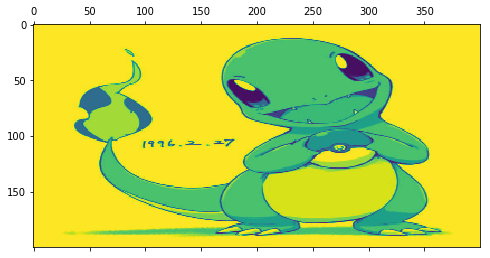

Image Sample : 45


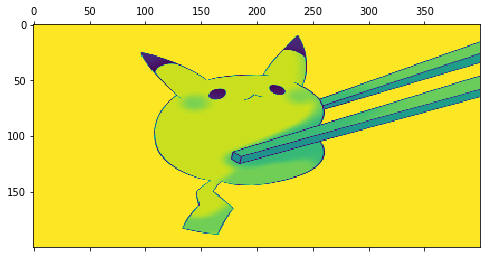

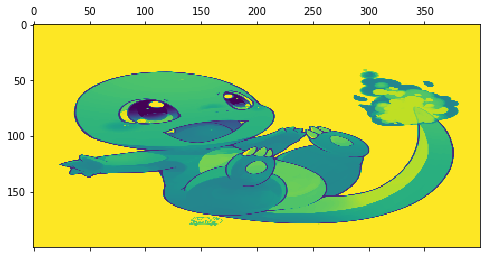

In [288]:
#Images are resized into 400x200 with cv2
for i in range(0,45):
    images[i]=cv2.resize(images[i],(400,200))
    char[i]=cv2.resize(char[i],(400,200))
#pyplot used for displaying all the images pikachu being the first image and charmander being the second
for i in range(0,45):
    print("Image Sample :",i+1)
    plt.matshow(images[i])
    plt.matshow(char[i])
    plt.show()
    

In [289]:
#All the distinct images are converted into a list and appened into a new list namingly chnPk
#process for pikachu
chnPk=[]
i=0
while True:
    p=[]
    for k in images[i]:
        for j in k:
                p.append(j)
    i+=1
    chnPk.append(p)
    if i==45:
        break
i=0
#process for Charmander
while True:
    c=[]
    for k in char[i]:
        for j in k:
                c.append(j)
    i+=1
    chnPk.append(c)
    if i==45:
        break

In [290]:
#the list chnpk is converted into a 2D numpy array
chnPk=np.array(chnPk)

In [291]:
#here the targets/output of the samples are created into a into a list named target
target=[]
#for Pikachu
for i in range(0,45):
    target.append("Pikachu")
#for charmander
for j in range(45,90):
    target.append("charmander")

In [332]:
#The data is split into training and testing (20% of which being testing and remaining 80% for training)
x_train,x_test,y_train,y_test=train_test_split(chnPk,target,test_size=.20,random_state=101)

In [333]:
knn=KNeighborsClassifier()
svc=SVC(gamma=.001)
#data being fitted into the KNN model
learn1=knn.fit(x_train,y_train)
#data being fitted into the SVC model
learn2=svc.fit(x_train,y_train)

In [334]:
#prediction of KNN learner
p1=learn1.predict(x_test)
#prediction of SVC learner
p2=learn2.predict(x_test)

In [335]:
#accuracy scores of both KNN and SVC 
print("Accuracy Scores:")
print("1)Using KNN",accuracy_score(y_test,p1)*100,"\n2)Using SVC", accuracy_score(y_test,p2)*100)


Accuracy Scores:
1)Using KNN 72.22222222222221 
2)Using SVC 61.111111111111114


In [336]:
#A test image (not included in datset)
test=cv2.imread(r"c:/Users/admin/Desktop/pubg v fortnite/pika_test.jpg",0)
test=cv2.resize(test,(400,200))

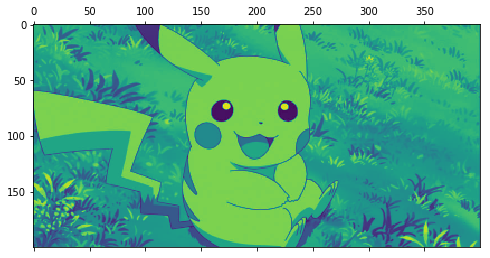

In [337]:
plt.matshow(test)

In [338]:
li=[]
for i in test:
    for j in i:
         li.append(j)   

In [339]:
print(learn1.predict([li]))
print(learn2.predict([li]))

['Pikachu']
['Pikachu']
